# Parte 2: EDA y Análisis estadístico
En este segundo archivo, se realizó la imputación de valores nulos para las columnas seleccionadas previamente y su transformación a un tipo de variable coherente. Posterior a la imputación, se observó la presencia de outliers (valores anómalos) sobre las variables de tipo numéricas, con el objetivo de eliminar dichos outliers, con la precausión que ésto no repercutiera en un posible sobre ajuste del futuro modelo de regresión lineal múltiple. <br>
Finalmente, se realizó un análisis estadístico por cada variable mediante tablas y gráficos de barra u torta según correspondiera, con el fin de tener un panorama más visual de la información a la que se está enfrentando.

<hr>

# EDA
Primero, se realiza la imputación de valores nulos para las diferentes columnas que los posean. Después se revisa la presencia de outliers en las variables de tipo numéricas mediante gráficos de Boxplot o de dispresión con linea de tendencia.

### Columnas
Las columnas extraídas desde el archivo de la encuesta CASEN 2017 fueron:
- region
- zona
- sexo
- edad
- e1: analfabetismo
- e6a: nivel educacional más alto
- o4: si ha trabajado alguna vez
- oficio1: ocupación u oficio
- rama1: a qué negocio se dedica
- y1: salario líquido del trabajo principal
- y4a: si ha recibido bonificaciones en los últimos 12 meses
- s5: la edad que tenía cuando nació el primer hijo 
- r1a: nacionalidad
- ytrabajocor: ingreso del trabajo
- esc: escolaridad
- activ: condición de actividad económica

In [1]:
# Librerias necesarias
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

# Configuracion de pandas para que no bloque asignaciones masivas
pd.options.mode.chained_assignment = None

## Se carga la encuesta filtrada

In [2]:
df =pd.read_excel("CASEN2017_seleccionada.xlsx")
df.head()

,region,zona,sexo,edad,e1,e6a,o4,oficio1,rama1,y1,y4a,s5,r1a,ytrabajocor,esc,activ
0,Región de Tarapacá,Urbano,Mujer,56,"Sí, lee y escribe",Educación Media Científico-Humanista,NaN,Trabajadores no calificado,Comercio al por mayor y al por menor,NaN,NaN,NaN,Otra nacionalidad. Especifique país,250000.0,12.0,Ocupados
1,Región de Tarapacá,Urbano,Mujer,21,"Sí, lee y escribe",Educación Básica,NaN,Trabajadores no calificado,Hogares privados con servicio doméstico,200000,0,NaN,Otra nacionalidad. Especifique país,200000.0,7.0,Ocupados
2,Región de Tarapacá,Urbano,Hombre,24,"Sí, lee y escribe",Educación Media Científico-Humanista,NaN,Trabajadores de los servicios y vendedores de ...,Hoteles y restaurantes,270000,15000,NaN,Chilena (Exclusiva),281750.0,12.0,Ocupados
3,Región de Tarapacá,Urbano,Hombre,28,"Sí, lee y escribe",Educación Media Científico-Humanista,NaN,Trabajadores de los servicios y vendedores de ...,Hoteles y restaurantes,300000,15000,NaN,Otra nacionalidad. Especifique país,311750.0,12.0,Ocupados
4,Región de Tarapacá,Urbano,Hombre,26,"Sí, lee y escribe",Técnico Nivel Superior Completo (Carreras 1 a ...,NaN,Trabajadores no calificado,Hogares privados con servicio doméstico,320000,20000,25,Otra nacionalidad. Especifique país,341667.0,15.0,Ocupados


## Datos básicos de la fuente de información

In [3]:
print("===================================================================")
print("Tamaño del dataframe:")
print(df.shape)
print("===================================================================")
print("Tipo de variable de las columnas:")
print(df.dtypes)
print("===================================================================")
print("Cantidad de valores nulos por columna:")
print(df.isna().sum())
print("===================================================================")

Tamaño del dataframe:
(216439, 16)
Tipo de variable de las columnas:
region          object
zona            object
sexo            object
edad             int64
e1              object
e6a             object
o4              object
oficio1         object
rama1           object
y1              object
y4a             object
s5              object
r1a             object
ytrabajocor    float64
esc            float64
activ           object
dtype: object
Cantidad de valores nulos por columna:
region              0
zona                0
sexo                0
edad                0
e1              41363
e6a                 0
o4             133780
oficio1        124022
rama1          124022
y1             147809
y4a            147809
s5              97067
r1a                 0
ytrabajocor    119204
esc             42381
activ           41363
dtype: int64


## Cantidad de valores nulos respecto a no nulos

In [8]:
# Funcion para obtener la cantida de datos no nulos por cada columna
def NoNulos(campo):
    n = df.shape[0]
    nulos = df[campo].isnull().sum()
    return n - nulos

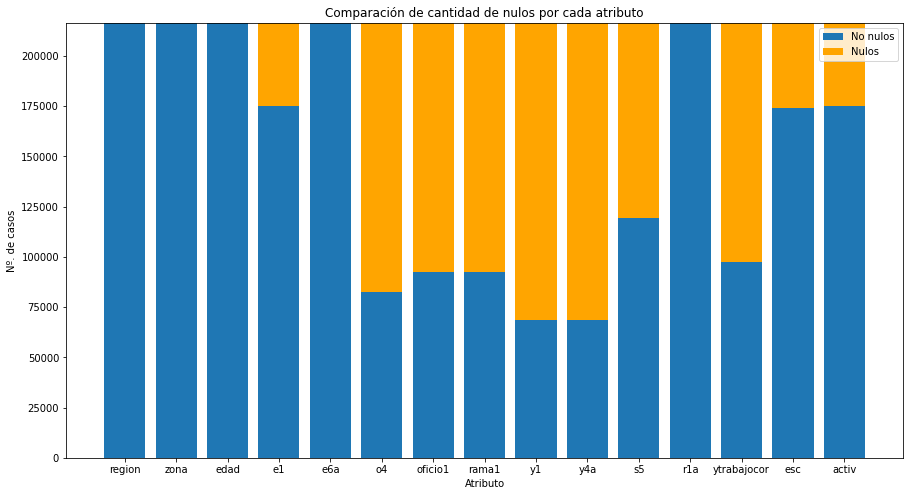

In [9]:
total_registros = df.shape[0]
data = [
    ["region", df["region"].isnull().sum(), NoNulos("region")],
    ["zona", df["zona"].isnull().sum(), NoNulos("zona")],
    ["edad", df["edad"].isnull().sum(), NoNulos("edad")],
    ["e1", df["e1"].isnull().sum(), NoNulos("e1")],
    ["e6a", df["e6a"].isnull().sum(), NoNulos("e6a")],
    ["o4", df["o4"].isnull().sum(), NoNulos("o4")],
    ["oficio1", df["oficio1"].isnull().sum(), NoNulos("oficio1")],
    ["rama1", df["rama1"].isnull().sum(), NoNulos("rama1")],
    ["y1", df["y1"].isnull().sum(), NoNulos("y1")],
    ["y4a", df["y4a"].isnull().sum(), NoNulos("y4a")],
    ["s5", df["s5"].isnull().sum(), NoNulos("s5")],
    ["r1a", df["r1a"].isnull().sum(), NoNulos("r1a")],
    ["ytrabajocor", df["ytrabajocor"].isnull().sum(), NoNulos("ytrabajocor")],
    ["esc", df["esc"].isnull().sum(), NoNulos("esc")],
    ["activ", df["activ"].isnull().sum(), NoNulos("activ")],
]
df2 = pd.DataFrame(data, columns = ["attribute", "null_count", "notnull_count"])
df2 = df2.set_index("attribute")

null_values = df2["null_count"]
not_nullvalues = df2["notnull_count"]

plt.figure(figsize=(15,8))
plt.bar(df2.index, not_nullvalues, label='No nulos')
plt.bar(df2.index, null_values, color='orange', label='Nulos', bottom=not_nullvalues)
plt.xlabel('Atributo')
plt.ylabel('Nº. de casos')
plt.title('Comparación de cantidad de nulos por cada atributo')
plt.legend(loc = "best")
plt.show()

# Imputación de valores nulos
A continuación se procede a la imputación de valores nulos por cada una de las variables que poseen dichos campos. Estas son analfabetismo(e1), si ha trabajado alguna vez(o4), ocupación u oficio (oficio1), a qué negocio se dedica (rama1), salario líquido del trabajo principal (y1), si ha recibido bonificaciones en los últimos 12 meses (y4a), la edad que tenía cuando nació el primer hijo (s5), ingreso del trabajo (ytrabajocor), escolaridad (esc) y condición de actividad económica (activ).

<hr>

## Inputación de la edad en que nació el primer hijo (e5)
Columna: s5 <br>
Tipo de variable: Object <br>
Cantidad de nulos: 97.067 <br>

Se imputan todos los valores nulos y convierte la columna a variable de tipo int64. Se sabe que la columna posee un tipo de registro llamado: "No sabe/No recuerda". Este registro se va a convertir al valor 0 y posteriormente, todos lo valores nulos se dejan bajo esta categoría neutra.

In [13]:
# Visualización de las diferentes categorías
df["s5"].value_counts()

20                     10154
21                      9005
19                      8665
22                      8544
18                      8318
23                      7597
25                      7300
24                      6915
17                      6039
26                      5460
27                      5183
30                      4257
28                      4227
16                      3646
29                      3478
No sabe/No recuerda     3203
32                      2170
31                      2151
15                      2134
33                      1926
34                      1385
35                      1363
36                      1018
14                       981
37                       804
38                       640
40                       579
39                       488
13                       355
42                       252
41                       235
12                       168
43                       156
44                       123
45            

In [14]:
# funcion de imputacion
def imputacion_s5(col):
    if(col is np.nan):
        return "0"
    else:
        if(col == "No sabe/No recuerda"):
            return "0"
        else:
            return col
        
# Aplicacion de la funcion de imputacion a todas las filas
df["s5"] = df["s5"].apply(imputacion_s5)
# Se convierte a tipo int64
df["s5"] = df["s5"].astype("int64")

print("===================================================================")
print("Cantidad de valores nulos de la columna:")
print(df["s5"].isna().sum())
print("===================================================================")
print("Tipo de variable de la columna:")
print(df["s5"].dtypes)
print("===================================================================")

Cantidad de valores nulos de la columna:
0
Tipo de variable de la columna:
int64


<hr>

## Imputación del nivel de analfabetismo
Columna: e1 <br>
Tipo de variable: Object <br>
Cantidad de nulos: 41363 <br>

Se imputan todos los valores nulos bajo la categoría de "No sabe/responde" (opción que existe previamente en la encuesta). Para esto se extrajo una muestra de sólo los campos nulos de nivel de analfabetismo; pero se añaden las variables de edad, escolaridad y la condición de actividad económica relacionadas a éstos, con el fin de observar un comportamiento más detallado para esta variable.

In [15]:
# Tipos de analfabetismos registrados en la encuesta
df["e1"].value_counts()

Sí, lee y escribe    167403
No, ninguno            5646
No, sólo lee           1289
No, sólo escribe        595
No sabe/responde        143
Name: e1, dtype: int64

In [16]:
# Se extrae la muestra de valores nulos de analfabetismo, edad y condición de actividad económica
df_e1Null = df[
    (df["e1"] != "Sí, lee y escribe") &
    (df["e1"] != "No, ninguno") &
    (df["e1"] != "No, sólo lee") &
    (df["e1"] != "No, sólo escribe") &
    (df["e1"] != "No sabe/responde")
]
df_e1Null = df_e1Null[["e1", "edad", "activ"]]
df_e1Null

,e1,edad,activ
6,NaN,1,NaN
12,NaN,1,NaN
24,NaN,10,NaN
25,NaN,3,NaN
34,NaN,8,NaN
...,...,...,...
216415,NaN,7,NaN
216416,NaN,6,NaN
216417,NaN,5,NaN
216420,NaN,14,NaN


__Histograma de edad__ <br>
Se desea visualizar el rango de edad de los registros nulos sobre la categoría de analfabetismo.

In [17]:
df_e1Null["edad"].describe()

count    41363.000000
mean         7.173053
std          4.229409
min          0.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         14.000000
Name: edad, dtype: float64

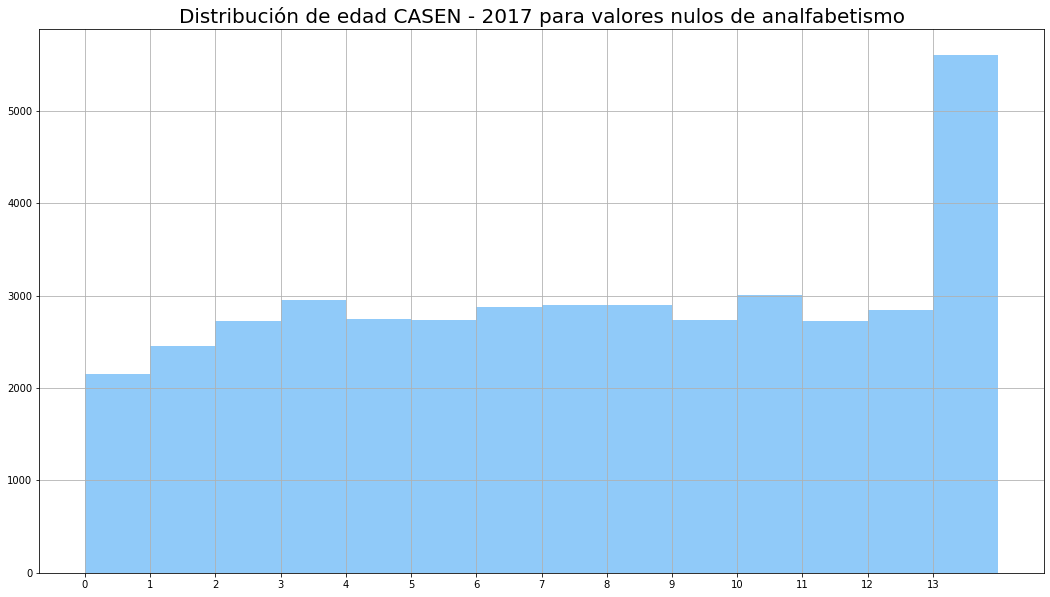

In [18]:
plt.figure(figsize=(18,10))
plt.grid()
plt.hist(df_e1Null["edad"], facecolor = "#90CAF9", bins = 14)
plt.title("Distribución de edad CASEN - 2017 para valores nulos de analfabetismo", fontsize = 20)
plt.xticks(np.arange(0, 14, 1))
plt.show()

In [19]:
print("===================================================================")
print("Tipos de condicion económica:")
print(df["activ"].value_counts())
print("===================================================================")

Tipos de condicion económica:
Ocupados       92417
Inactivos      74856
Desocupados     7803
Name: activ, dtype: int64


Se observa la coincidencia de que, aquellos registros que no posee información relacionada al nivel analfabetismo son menores de edad de acuerdo al histograma de edad anterior. En base a esto, las imputaciones para estas columnas se deja como:
- e1 (analfabetismo): No sabe/responde
- activ (condicion de actividad económica): Inactivos, ya que son todos menores de 16 años que es el punto para considerarse como población activa
<br>

__Esta imputación aplica sólo para aquellos registros que tengan su nivel de analfabetismo como "nulo"__

In [20]:
# Imputacion de condicion de actividad económica aplicada sobre la condicion de analfabetismo
def imputacion_activ(fila):
    if(fila["e1"] is np.nan):
        return "Inactivos"
    else:
        return fila["activ"]

# Imputación de analfabetismo
def imputacion_e1(fila):
    if(fila["e1"] is np.nan):
        return "No sabe/responde"
    else:
        return fila["e1"]
    
# Se aplica primero la imputación sobre la categoría de actividad económica y posteriormente sobre analfabetismo
df["activ"] = df.apply(imputacion_activ, axis = 1)
df["e1"] = df.apply(imputacion_e1, axis = 1)
df.isna().sum()

region              0
zona                0
sexo                0
edad                0
e1                  0
e6a                 0
o4             133780
oficio1        124022
rama1          124022
y1             147809
y4a            147809
s5                  0
r1a                 0
ytrabajocor    119204
esc             42381
activ               0
dtype: int64

<hr>

## Imputación de si ha trabajado alguna vez, oficio y el negocio al que se dedica
Columna: o4 <br>
Tipo de variable: Object <br>
Cantidad de nulos: 92.417 <br>

Columna: oficio1 <br>
Tipo de variable: Object <br>
Cantidad de nulos: 124.022 <br>

Columna: rama1 <br>
Tipo de variable: Object <br>
Cantidad de nulos: 124.022 <br>

Los valores nulos se van a imputar bajo las categorías existentes de "No sabe/no responde" para el caso de oficio y para el de ocupación se emplea la etiqueta previamente existente asociada a los registros "Sin dato".

In [24]:
print("===========================================================================")
print("Tipos de si ha trabajado alguna vez:\n")
print(df["o4"].value_counts())
print("===========================================================================")
print("Tipos de ocupación:\n")
print(df["oficio1"].value_counts())
print("===========================================================================")
print("Tipos de negocio al que se dedica:\n")
print(df["rama1"].value_counts())
print("===========================================================================")

Tipos de si ha trabajado alguna vez:

Sí                     52045
No                     30004
No sabe/no responde      610
Name: o4, dtype: int64
Tipos de ocupación:

Trabajadores no calificado                                      21208
Trabajadores de los servicios y vendedores de comerci           14196
Oficiales, operarios y artesanos de artes mecánicas y de otr    12985
Profesionales, científicos e intelectuale                       10427
Técnicos profesionales de nivel medi                             9064
Operadores de instalaciones y máquinas y montadore               8188
Empleados de oficina                                             6467
Agricultores y trabajadores calificados agropecuarios y pesq     4807
Miembros del poder ejecutivo y de los cuerpos legislativo        4337
Fuerzas Armada                                                    453
Sin dato                                                          285
Name: oficio1, dtype: int64
Tipos de negocio al que se dedica

In [25]:
# Imputacion sobre la variable si ha trabajado alguna vez
def imputacion_o4_completa(fila):
    if(fila["o4"] is np.nan):
        return "No sabe/no responde"
    else:
        return fila["o4"]

# Imputacion sobre la variable del tipo de ocupacion
def imputacion_oficio1(fila):
    if(fila["oficio1"] is np.nan):
        return "Sin dato"
    else:
        return fila["oficio1"]

# Imputacion sobre el tipo de negocio al que se dedica
def imputacion_rama1(fila):
    if(fila["rama1"] is np.nan):
        return "Sin dato"
    else:
        return fila["rama1"]
    
df["o4"] = df.apply(imputacion_o4_completa, axis = 1)
df["oficio1"] = df.apply(imputacion_oficio1, axis = 1)
df["rama1"] = df.apply(imputacion_rama1, axis = 1)
df.isna().sum()

region              0
zona                0
sexo                0
edad                0
e1                  0
e6a                 0
o4                  0
oficio1             0
rama1               0
y1             147809
y4a            147809
s5                  0
r1a                 0
ytrabajocor    119204
esc             42381
activ               0
dtype: int64

<hr>

## Imputación del salario líquido y si ha recibido bonificaciones en los últimos 12 meses
Columna: y1 <br>
Tipo de variable: Object <br>
Cantidad de nulos: 147.809 <br>

Columna: y4a <br>
Tipo de variable: Object <br>
Cantidad de nulos: 147.809 <br>

Dentro de ambas columnas existe la opción de "No sabe". Esta opción se reemplaza por 0 y posteriormente los valores nulos se imputan bajo esta categoría. Finalmente, se convierte el tipo de variable de "Object" a "int64".

In [26]:
df["y1"].value_counts().sort_values(ascending = False)

270000     6710
300000     5312
No sabe    4354
400000     4125
350000     3202
           ... 
251944        1
8500000       1
910000        1
63000         1
983000        1
Name: y1, Length: 1133, dtype: int64

In [27]:
df["y4a"].value_counts().sort_values(ascending = False)

0           42031
No sabe      3998
50000        2665
30000        2164
40000        1755
            ...  
61494           1
50000000        1
20800           1
51600           1
131000          1
Name: y4a, Length: 497, dtype: int64

In [28]:
# funcion de imputacion del salario liquido
def imputacion_y1(col):
    if(col is np.nan):
        return "0"
    else:
        if(col == "No sabe"):
            return "0"
        else:
            return col

# funcion de imputacion sobre las bonificaciones recibidas
def imputacion_y4a(col):
    if(col is np.nan):
        return "0"
    else:
        if(col == "No sabe"):
            return "0"
        else:
            return col        
        
# Aplicacion de la funcion de imputacion
df["y1"] = df["y1"].apply(imputacion_y1)
# Se convierte a tipo int64
df["y1"] = df["y1"].astype("int64")

# Aplicacion de la funcion de imputacion
df["y4a"] = df["y4a"].apply(imputacion_y4a)
# Se convierte a tipo int64
df["y4a"] = df["y4a"].astype("int64")

print("===================================================================")
print("Cantidad de valores nulos de la columna:")
print(df["y1"].isna().sum())
print("===================================================================")
print("Tipo de variable de la columna:")
print(df["y1"].dtypes)
print("===================================================================")
print("Cantidad de valores nulos de la columna:")
print(df["y4a"].isna().sum())
print("===================================================================")
print("Tipo de variable de la columna:")
print(df["y4a"].dtypes)
print("===================================================================")

Cantidad de valores nulos de la columna:
0
Tipo de variable de la columna:
int64
Cantidad de valores nulos de la columna:
0
Tipo de variable de la columna:
int64


In [29]:
df.isna().sum()

region              0
zona                0
sexo                0
edad                0
e1                  0
e6a                 0
o4                  0
oficio1             0
rama1               0
y1                  0
y4a                 0
s5                  0
r1a                 0
ytrabajocor    119204
esc             42381
activ               0
dtype: int64

## Imputación de las columnas restantes
En vista que estas columnas representan un volumen de 119.204 del total de 216.439, en otras palabras un 55,08% de los registros, imputarlas mediante el promedio puede no resultar muy representativo, y es probable que el modelo no se ajuste bien a la realidad. Lo que se realiza es borrar todos estos registros nulos del dataset.

In [30]:
# Se borran los registros nulos
df = df.dropna()
print("Registros nulos borrados!!")

Registros nulos borrados!!


In [31]:
df.shape

(96411, 16)

<hr>

## Nuevo gráfico de valores nulos vs valores no nulos

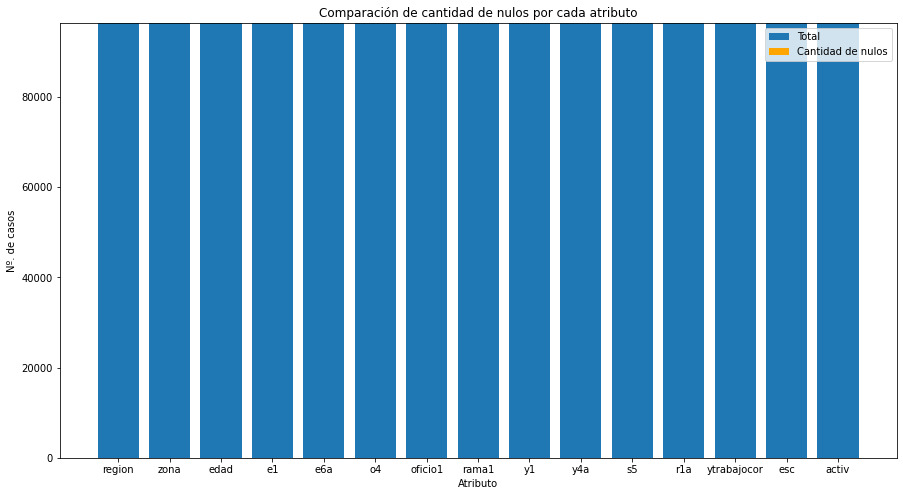

In [32]:
total_registros = df.shape[0]
data = [
    ["region", df["region"].isnull().sum(), NoNulos("region")],
    ["zona", df["zona"].isnull().sum(), NoNulos("zona")],
    ["edad", df["edad"].isnull().sum(), NoNulos("edad")],
    ["e1", df["e1"].isnull().sum(), NoNulos("e1")],
    ["e6a", df["e6a"].isnull().sum(), NoNulos("e6a")],
    ["o4", df["o4"].isnull().sum(), NoNulos("o4")],
    ["oficio1", df["oficio1"].isnull().sum(), NoNulos("oficio1")],
    ["rama1", df["rama1"].isnull().sum(), NoNulos("rama1")],
    ["y1", df["y1"].isnull().sum(), NoNulos("y1")],
    ["y4a", df["y4a"].isnull().sum(), NoNulos("y4a")],
    ["s5", df["s5"].isnull().sum(), NoNulos("s5")],
    ["r1a", df["r1a"].isnull().sum(), NoNulos("r1a")],
    ["ytrabajocor", df["ytrabajocor"].isnull().sum(), NoNulos("ytrabajocor")],
    ["esc", df["esc"].isnull().sum(), NoNulos("esc")],
    ["activ", df["activ"].isnull().sum(), NoNulos("activ")],
]
df3 = pd.DataFrame(data, columns = ["attribute", "null_count", "notnull_count"])
df3 = df3.set_index("attribute")
null_values = df3["null_count"]
not_nullvalues = df3["notnull_count"]

plt.figure(figsize=(15,8))
plt.bar(df3.index, not_nullvalues, label='Total')
plt.bar(df3.index, null_values, color='orange', label='Cantidad de nulos', bottom=not_nullvalues)
plt.xlabel('Atributo')
plt.ylabel('Nº. de casos')
plt.title('Comparación de cantidad de nulos por cada atributo')
plt.legend(loc = "best")
plt.show()

# Revisión de outliers en variables de tipo numéricas
Una vez imputados los valores, se procede a revisar la existencia de valores que puedan ser anormales o atípicos dentro de las varibables de tipo numércias, que finalmente repercutan en que el modelo no pueda explicar con precisión lo que se desea predecir. Las variables que se analizan son:
- edad 
- y1 (salario líquido del trabajo principal)
- y4a (si ha recibido bonificaciones)
- s5 (edad que tenía cuando nació el primer hijo)
- ytrabajocor (ingreso del trabajo)
- esc (años de escolaridad)

<hr>

In [35]:
# Funcion para crear una tabla con los valores de BoxPlot
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['cota inferior'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['primer cuartil (25%)'] = bp['boxes'][i].get_ydata()[1]
        dict1['mediana (50%)'] = bp['medians'][i].get_ydata()[1]
        dict1['tercer cuartil (75%)'] = bp['boxes'][i].get_ydata()[2]
        dict1['cota superior'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

## Tabla con los valores de boxplot
La función anterior, permite obtener los valores que entrega el gráfico de BoxPlot, el cual resulta ser ideal para detectar valores outliers o anómalos dentro de las variables numércias. Con la tabla se obtiene el valor de la cota inferior, primer cuartil (25%), la mediana (50%), tercer cuartil (75%) y la cota superior.

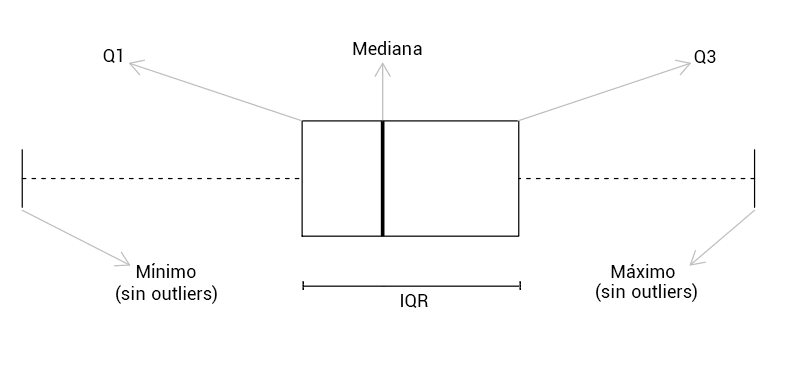

## Revisión de la columna "edad"

In [36]:
df["edad"].describe()

count    96411.000000
mean        43.864673
std         14.720113
min         15.000000
25%         31.000000
50%         43.000000
75%         55.000000
max        100.000000
Name: edad, dtype: float64

### _Tabla y gráfico de valores Boxplot_

In [37]:
labels = ["edad"]
bp = plt.boxplot([df['edad']], labels = labels)
plt.close()  #se cancela la muestra el grafico para que solo se muestre la tabla
get_box_plot_data(labels, bp)

,label,cota inferior,primer cuartil (25%),mediana (50%),tercer cuartil (75%),cota superior
0,edad,15.0,31.0,43.0,55.0,91.0


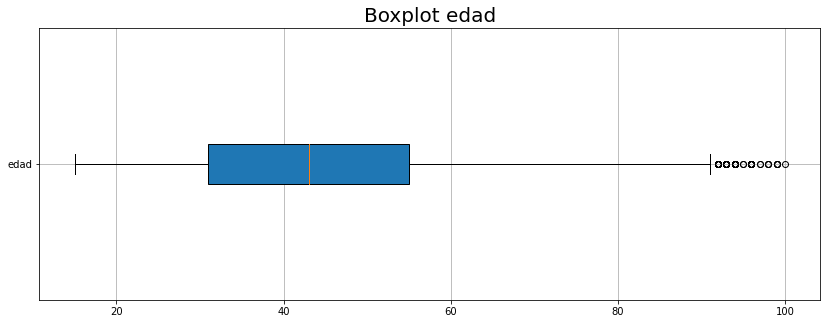

In [38]:
plt.figure(figsize=(14, 5))
plt.grid()
plt.title("Boxplot edad", fontsize = 20)
plt.boxplot(df['edad'], labels = ["edad"], patch_artist=True, vert=False)
plt.show()

Se puede observar a la derecha del gráfico la existencia de datos outliers o que se salen de lo común. Esto puede causar un cierto desvalance al momento de aplicar el modelo de regresión lineal múltiple, por lo que se evalua la cantidad de datos a las que equivale para realizar la posterior eliminación.

In [39]:
print("============================================================================")
print("Cantidad de valores outlier (valores de edad que exceden los 91 años):")
print(df[(df["edad"] > 91)].shape[0])
print("============================================================================")

Cantidad de valores outlier (valores de edad que exceden los 91 años):
68


In [40]:
# Eliminacion de los registros
df = df.drop(df[df.edad > 91].index)
df.shape

(96343, 16)

## Revisión de la columna "salario líquido del trabajo principal"

In [41]:
df['y1'].describe().apply(lambda x: format(x, 'f')) # Para evitar valores con notacion cientifica

count       96343.000000
mean       331455.118275
std        530915.628349
min             0.000000
25%             0.000000
50%        270000.000000
75%        400000.000000
max      34000000.000000
Name: y1, dtype: object

### _Tabla y gráfico de valores Boxplot_

In [42]:
labels = ["salario líquido del trabajo principal"]
bp = plt.boxplot([df['y1']], labels = labels)
plt.close()  #se cancela la muestra el grafico para que solo se muestre la tabla
get_box_plot_data(labels, bp)

,label,cota inferior,primer cuartil (25%),mediana (50%),tercer cuartil (75%),cota superior
0,salario líquido del trabajo principal,0.0,0.0,270000.0,400000.0,1000000.0


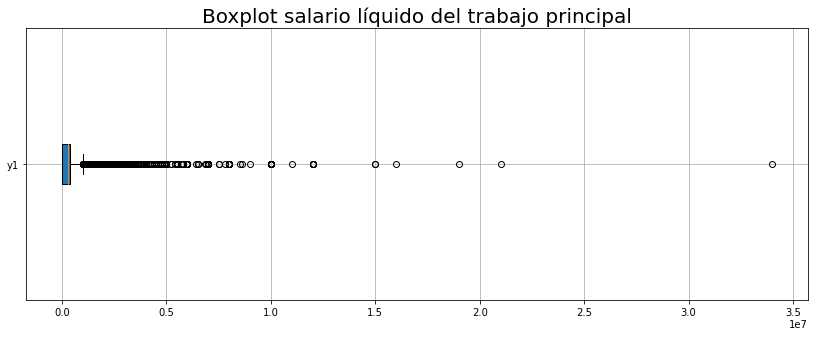

In [43]:
plt.figure(figsize=(14, 5))
plt.grid()
plt.title("Boxplot salario líquido del trabajo principal", fontsize = 20)
plt.boxplot(df['y1'], labels = ["y1"], patch_artist=True, vert=False)
plt.show()

### _Gráfico de dispresión con línea de tendencia_

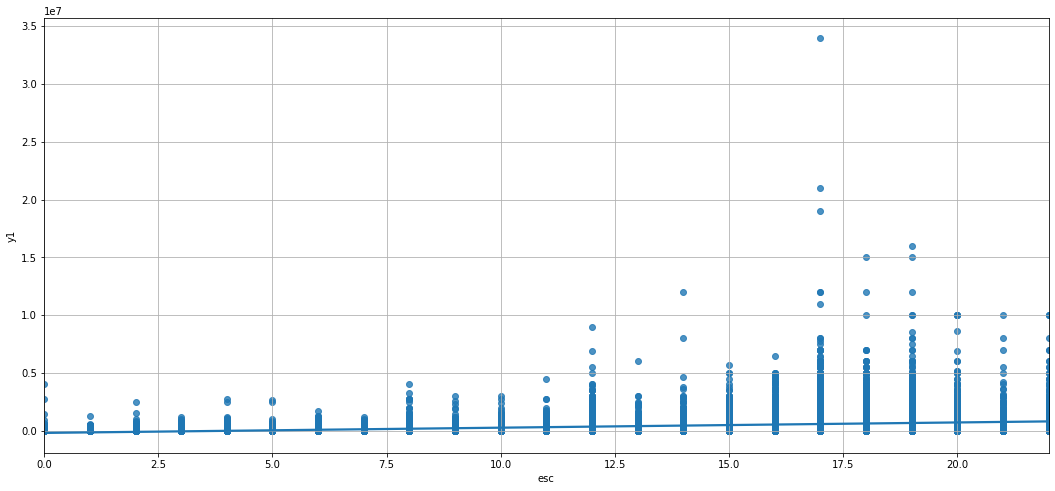

In [44]:
plt.figure(figsize=(18,8))
plt.grid()
sns.regplot(x="esc", y="y1", data=df);

Se puede apreciar cláramente como exite un volumen considerable de valores outliers que pueden terminar afectando de forma negativa el futuro modelo. De acuero a la tabla de valores boxplot, todos los valores superiores a un ingreso de \$1.000.000 de pesos, vendrían siendo valores outliers. Se obtendrá la cantidad de registros que cumplen dicha condición para evaluar una posterior eliminación.

In [45]:
# Se crea un nuevo dataset con los valores outliers para estudiarlos de forma independiente
df2 = df[(df["y1"] > 1000000)]
df2["y1"].describe().apply(lambda x: format(x, 'f'))

count        4872.000000
mean      1942531.530378
std       1297210.714988
min       1000030.000000
25%       1250000.000000
50%       1500000.000000
75%       2000000.000000
max      34000000.000000
Name: y1, dtype: object

_La cantidad de valores outliers para el salario líquido del trabajo principal equivalen a 4.872 registros. Al no ser un valor mayor al 10% del total de la muestra, se procede a eliminar todos los registros outliers_

In [46]:
# Eliminacion de los registros de ingreso que superen el 1.000.000 de pesos
df = df.drop(df[df.y1 > 1000000].index)
df.shape

(91471, 16)

Revisión para ver si mejora la distribución de registros

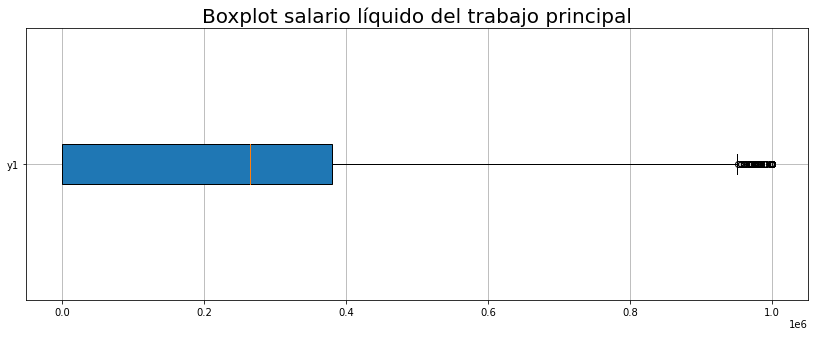

In [47]:
plt.figure(figsize=(14, 5))
plt.grid()
plt.title("Boxplot salario líquido del trabajo principal", fontsize = 20)
plt.boxplot(df['y1'], labels = ["y1"], patch_artist=True, vert=False)
plt.show()

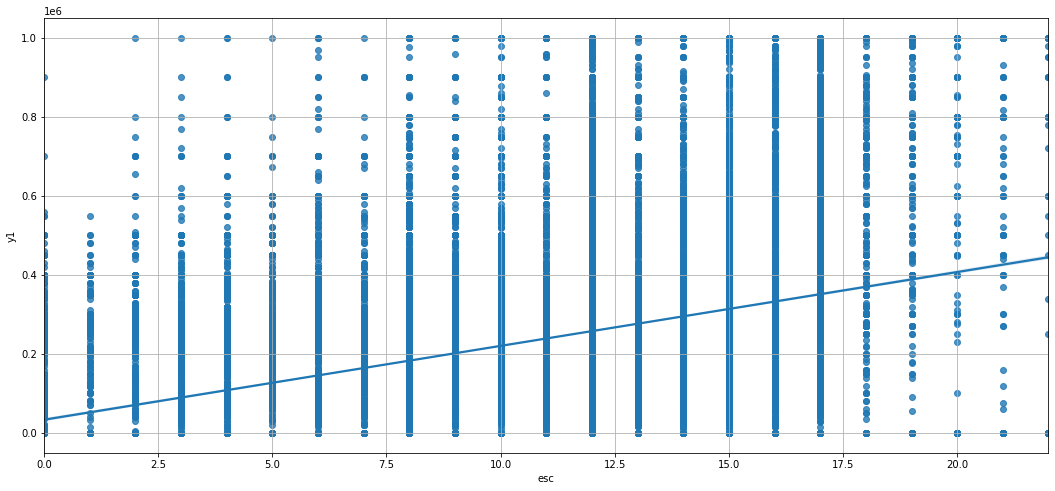

In [48]:
plt.figure(figsize=(18,8))
plt.grid()
sns.regplot(x="esc", y="y1", data=df);

De acuerdo al gráfico de boxplot se puede observar que todavía existen valores outliers; pero si se observa el segundo gráfico de dispersión con línea de tendencia, se aprecia también que la distribución de valores es mucho más "representativa" que para el primer par de gráficos. Para evitar un __sobre ajuste del modelo__ no se van a seguir eliminando registros.

## Revisión de la columna "si ha recibido bonificaciones"

In [49]:
df['y4a'].describe().apply(lambda x: format(x, 'f'))

count       91471.000000
mean        21483.211728
std        144302.833262
min             0.000000
25%             0.000000
50%             0.000000
75%             0.000000
max      20000000.000000
Name: y4a, dtype: object

### _Tabla de valores y gráfico Boxplot_

In [50]:
labels = ["si ha recibido bonificaciones"]
bp = plt.boxplot([df['y4a']], labels = labels)
plt.close()  #se cancela la muestra el grafico para que solo se muestre la tabla
get_box_plot_data(labels, bp)

,label,cota inferior,primer cuartil (25%),mediana (50%),tercer cuartil (75%),cota superior
0,si ha recibido bonificaciones,0.0,0.0,0.0,0.0,0.0


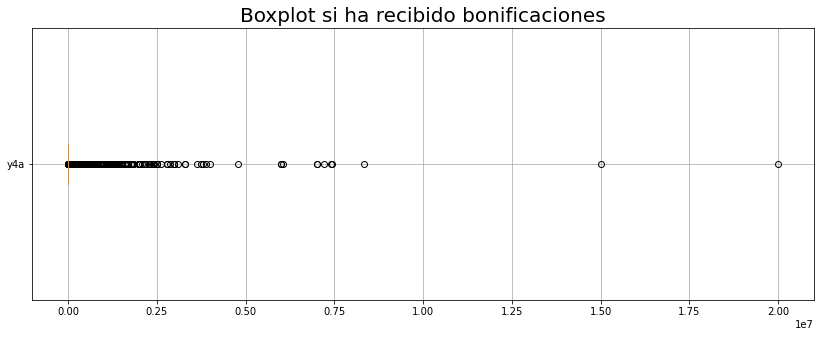

In [51]:
plt.figure(figsize=(14, 5))
plt.grid()
plt.title("Boxplot si ha recibido bonificaciones", fontsize = 20)
plt.boxplot(df['y4a'], labels = ["y4a"], patch_artist=True, vert=False)
plt.show()

### _Gráfico de dispresión con línea de tendencia_

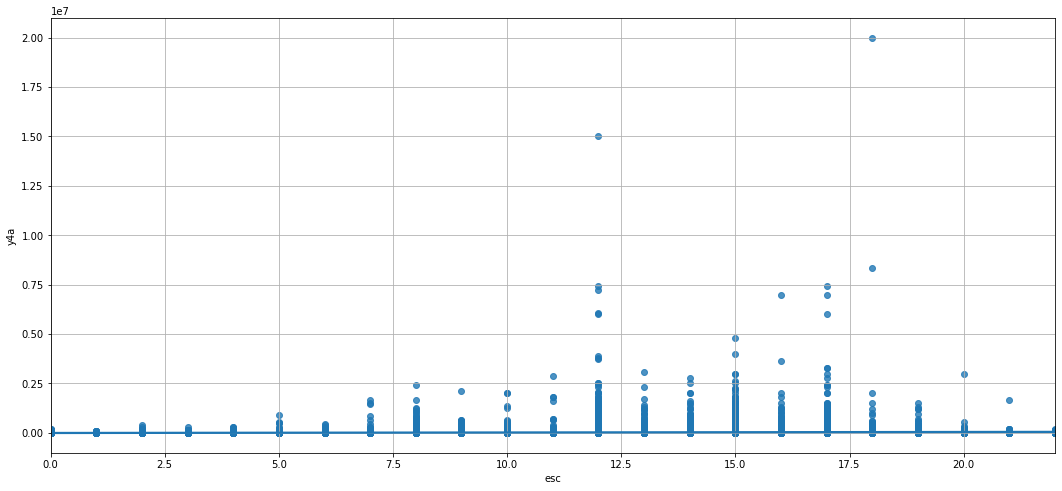

In [52]:
plt.figure(figsize=(18,8))
plt.grid()
sns.regplot(x="esc", y="y4a", data=df);

Se puede observar de acuerdo al gráfico de boxplot, que existe cláramente un gran volumen de valores outliers. Esto además se ve reafirmado con el gráfico de dispersión con línea de tendencia. Para observar mejor este comportamiento, se va copia el dataset original a uno secundario, para estudiar con más detalle la distribución de esta variable, la cual se lleva a puntaje típico.

In [54]:
# copia del dataframe original
df_copia = df.copy()
df_copia.shape

(91471, 16)

In [55]:
# Se crea una nueva columna con los datos normalizados
df_copia['puntaje_Z_y4a'] = (df_copia['y4a'] - df_copia['y4a'].mean())/df_copia['y4a'].std(ddof=0)
df_copia["puntaje_Z_y4a"].describe().apply(lambda x: format(x, 'f'))

count    91471.000000
mean         0.000000
std          1.000005
min         -0.148877
25%         -0.148877
50%         -0.148877
75%         -0.148877
max        138.449298
Name: puntaje_Z_y4a, dtype: object

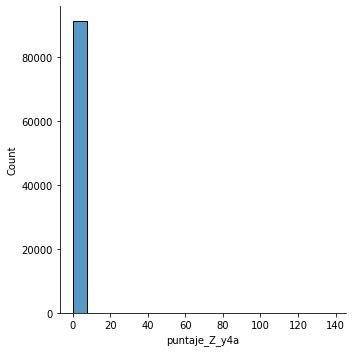

In [56]:
sns.displot(df_copia['puntaje_Z_y4a'])
plt.show()

Se muestran los datos de aquellos que poseen un puntaje típico muy alto

count    89589.0
mean        -0.0
std          0.0
min         -0.0
25%         -0.0
50%         -0.0
75%         -0.0
max          1.0
Name: puntaje_Z_y4a, dtype: float64


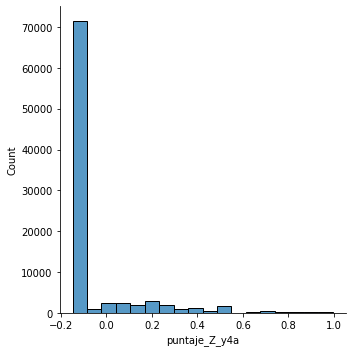

In [57]:
df_copia2=df_copia[df_copia['puntaje_Z_y4a']<=1] # Se redondea la distribucion para que contemple 1 distancia de desviacion std
print(round(df_copia2['puntaje_Z_y4a'].describe(include=all)))
sns.displot(df_copia2['puntaje_Z_y4a'])
plt.show()

Se puede apreciar que la cantidad de registros outliers para la columna "si ha recibido bonificaciones" es un gran volumen. Por ende, para evitar una gran pérdida de registros es conveniente eliminar esta variable del set de datos original.

In [58]:
# Se elimina el y4a
del df["y4a"]
df.shape

(91471, 15)

## Revisión de la columna "edad que tenía cuando nació el primer hijo"

In [59]:
df['s5'].describe()

count    91471.000000
mean        17.260837
std         11.737899
min          0.000000
25%          0.000000
50%         20.000000
75%         25.000000
max         62.000000
Name: s5, dtype: float64

### _Tabla y gráfico de valores Boxplot_

In [60]:
labels = ["edad que tenía cuando nació el primer hijo"]
bp = plt.boxplot([df['s5']], labels = labels)
plt.close()  #se cancela la muestra el grafico para que solo se muestre la tabla
get_box_plot_data(labels, bp)

,label,cota inferior,primer cuartil (25%),mediana (50%),tercer cuartil (75%),cota superior
0,edad que tenía cuando nació el primer hijo,0.0,0.0,20.0,25.0,62.0


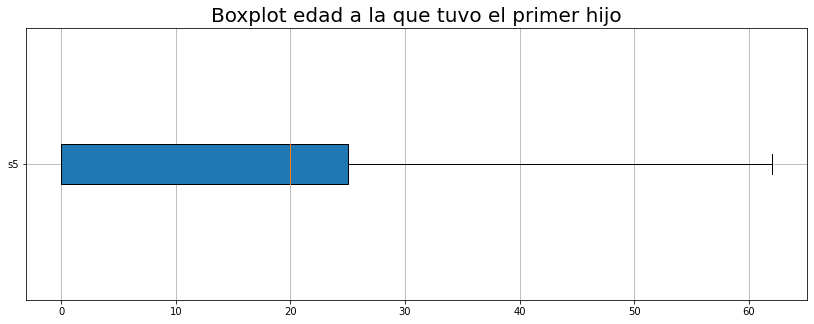

In [61]:
plt.figure(figsize=(14, 5))
plt.grid()
plt.title("Boxplot edad a la que tuvo el primer hijo", fontsize = 20)
plt.boxplot(df['s5'], labels = ["s5"], patch_artist=True, vert=False)
plt.show()

### _Gráfico de dispresión con línea de tendencia_

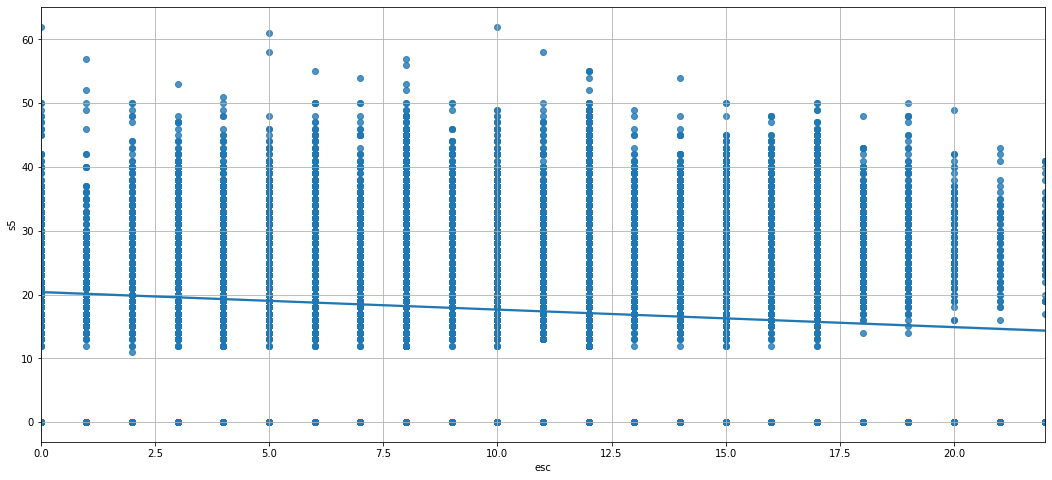

In [62]:
plt.figure(figsize=(18,8))
plt.grid()
sns.regplot(x="esc", y="s5", data=df);

Se aprecia que el gráfico de Boxplot no arroja ningún valor outlier. En el posterior gráfico de regresión también se puede ver como es que los puntos no distan de forma excesiva de la recta expuesta. Por lo que para esta variable no es necesaria la eliminación de valores outliers o atípicos.

## Revisión de la columna "ingreso del trabajo"

In [63]:
df["ytrabajocor"].describe().apply(lambda x: format(x, 'f'))

count       91471.000000
mean       427400.593543
std        599676.450604
min            42.000000
25%        240000.000000
50%        313333.000000
75%        500000.000000
max      80000000.000000
Name: ytrabajocor, dtype: object

### _Tabla y gráfico de valores Boxplot_

In [64]:
labels = ["ingreso del trabajo"]
bp = plt.boxplot([df['ytrabajocor']], labels = labels)
plt.close()  #se cancela la muestra el grafico para que solo se muestre la tabla
get_box_plot_data(labels, bp)

,label,cota inferior,primer cuartil (25%),mediana (50%),tercer cuartil (75%),cota superior
0,ingreso del trabajo,42.0,240000.0,313333.0,500000.0,890000.0


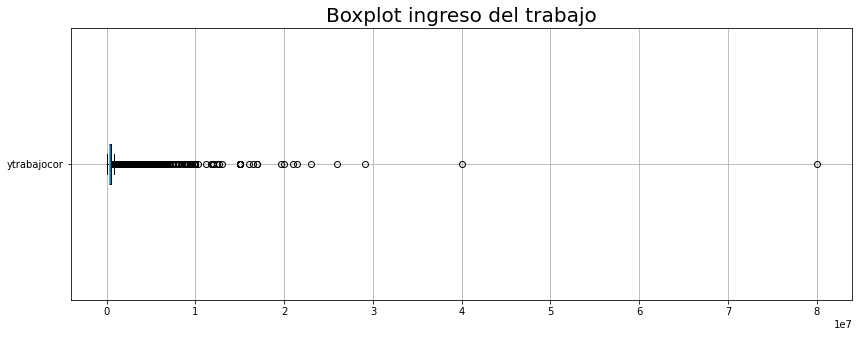

In [65]:
plt.figure(figsize=(14, 5))
plt.grid()
plt.title("Boxplot ingreso del trabajo", fontsize = 20)
plt.boxplot(df['ytrabajocor'], labels = ["ytrabajocor"], patch_artist=True, vert=False)
plt.show()

### _Gráfico de dispresión con línea de tendencia_

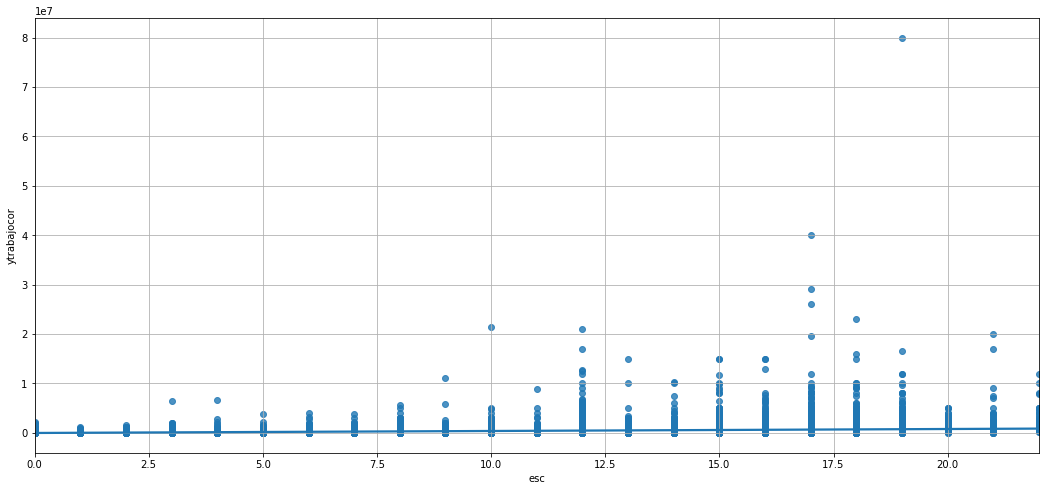

In [66]:
plt.figure(figsize=(18,8))
plt.grid()
sns.regplot(x="esc", y="ytrabajocor", data=df);

El gráfico de Boxplot muestra la existencia de datos outliers relacionados a la variable de ingreso de trabajo principal. A continuación se procede a ver la cantidad de registros que exceden esta cantidad en base al valor de la cota superior del gráfico de boxplot, con el fin de tomar la decisión de borrar dichos outliers (en caso que sean un bajo volumen de datos) o eliminar la variable (en caso que sean un volumen representativo del total de datos disponibles).

In [67]:
print("============================================================================")
print("Cantidad de valores outlier (valores de edad que exceden los $890.000):")
print(df[(df["ytrabajocor"] > 890000)].shape[0])
print("============================================================================")

Cantidad de valores outlier (valores de edad que exceden los $890.000):
6925


_Se puede observar que el volumen de datos outliers asociados al ingreso principal no es mayor al 10% del total de la muestra, por lo que se pueden eliminar ya que no representan un volumen significativo de datos._

In [68]:
# Eliminacion de los registros de ingreso que superen el 890.000 de pesos
df = df.drop(df[df.ytrabajocor > 890000].index)
df.shape

(84546, 15)

Revision de si hubo mejora en la distribución de datos

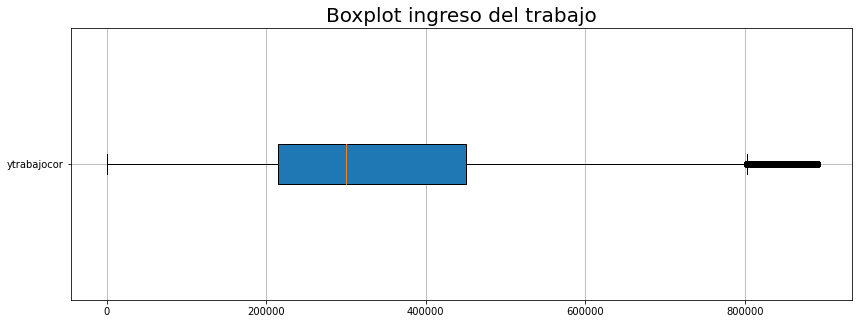

In [69]:
plt.figure(figsize=(14, 5))
plt.grid()
plt.title("Boxplot ingreso del trabajo", fontsize = 20)
plt.boxplot(df['ytrabajocor'], labels = ["ytrabajocor"], patch_artist=True, vert=False)
plt.show()

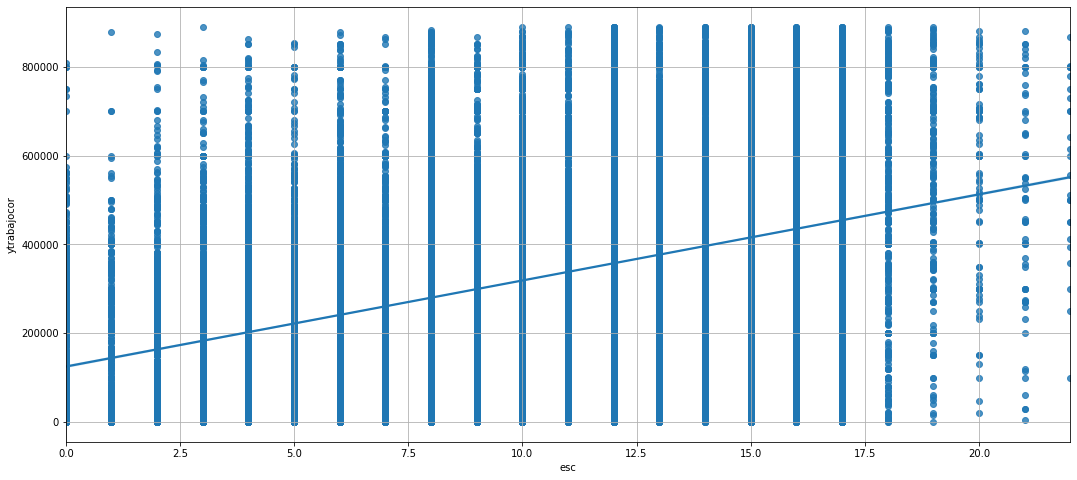

In [70]:
plt.figure(figsize=(18,8))
plt.grid()
sns.regplot(x="esc", y="ytrabajocor", data=df);

De acuerdo al gráfico de boxplot se puede observar que todavía existen valores outliers (bastante menor comparado con el primer gráfico); pero si se observa el segundo gráfico de dispersión con línea de tendencia, se aprecia también que la distribución de valores es mucho más "representativa" que para el primer par de gráficos. Para evitar un __sobre ajuste del modelo__ no se van a seguir eliminando registros.

## Revisión de la columna "años de escolaridad"

In [72]:
df["esc"].describe().apply(lambda x: format(x, 'f'))

count    84546.000000
mean        11.050363
std          3.834135
min          0.000000
25%          8.000000
50%         12.000000
75%         13.000000
max         22.000000
Name: esc, dtype: object

### _Tabla y gráfico de valores Boxplot_

In [73]:
labels = ["años de escolaridad"]
bp = plt.boxplot([df['esc']], labels = labels)
plt.close()  #se cancela la muestra el grafico para que solo se muestre la tabla
get_box_plot_data(labels, bp)

,label,cota inferior,primer cuartil (25%),mediana (50%),tercer cuartil (75%),cota superior
0,años de escolaridad,1.0,8.0,12.0,13.0,20.0


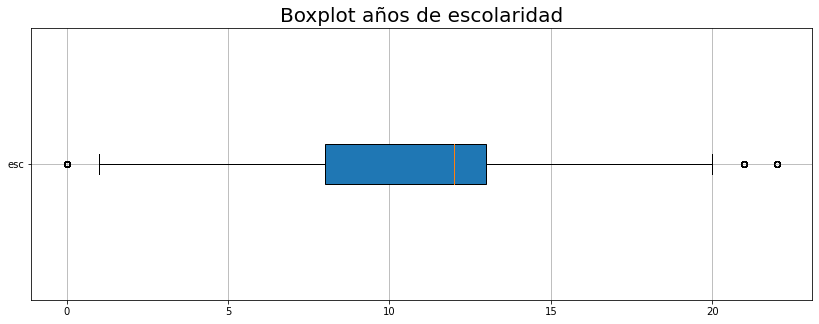

In [74]:
plt.figure(figsize=(14, 5))
plt.grid()
plt.title("Boxplot años de escolaridad", fontsize = 20)
plt.boxplot(df['esc'], labels = ["esc"], patch_artist=True, vert=False)
plt.show()

El gráfico de boxplot previamente descrito, expone un volumen acotado de valores outliers. A continuación se va a ver cuántos són con más precisión con el fin de determinar si es considerable eliminarlos o no.

In [75]:
print("============================================================================")
print("Cantidad de valores outlier (valores que excen los 20 años de escolaridad):")
print(df[(df["esc"] > 20)].shape[0])
print("============================================================================")

Cantidad de valores outlier (valores que excen los 20 años de escolaridad):
90


Al ser un volumen tan pequeño de datos, __no se van a eliminar__ con el objetivo de evitar un posible sobre ajuste del modelo, ya que la variable que se desea predecir son los años de escolaridad mediante un modelo de regresión lineal.

<hr>

# Estadística descriptiva y distribución de los datos del dataframe

A continuación se muestra la forma en que está distribuida la información en la muestra extraída de la encuesta CASEN - 2017. Recordar que esta muestra pasó por todo un proceso de imputación de datos y eliminación de registros anómalos o valores outliers.

## Histograma de distribución de la edad 

In [76]:
df["edad"].describe()

count    84546.000000
mean        43.765524
std         14.973289
min         15.000000
25%         31.000000
50%         43.000000
75%         55.000000
max         91.000000
Name: edad, dtype: float64

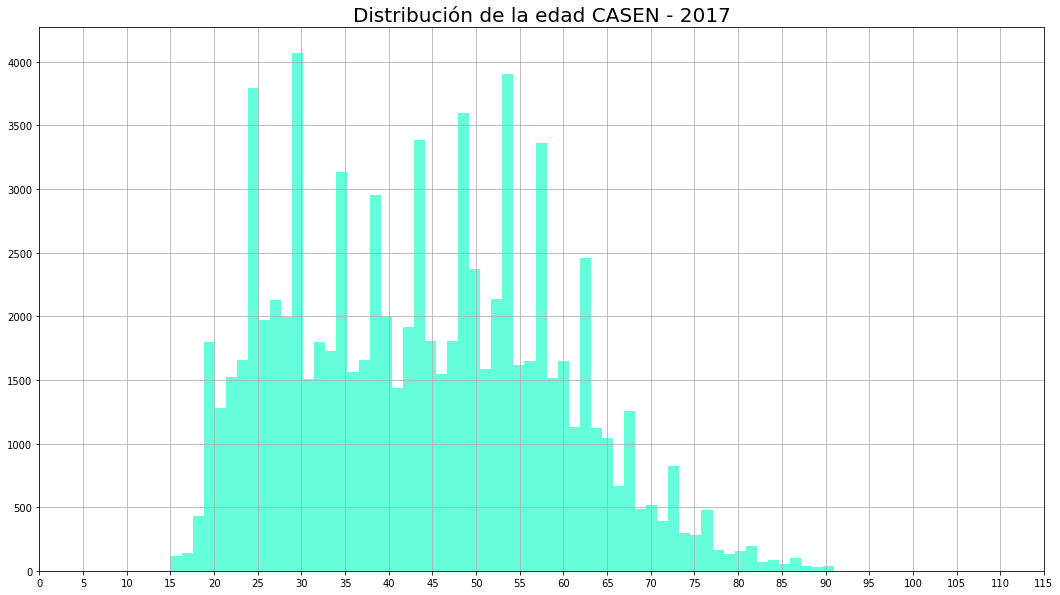

In [77]:
plt.figure(figsize=(18,10))
plt.grid()
plt.hist(df["edad"], facecolor = "#64FFDA", bins = 60)
plt.title("Distribución de la edad CASEN - 2017", fontsize = 20)
plt.xticks(np.arange(0, 120, 5))
plt.show()

<hr>

## Histograma de la distribución de años de escolaridad

In [78]:
df["esc"].describe()

count    84546.000000
mean        11.050363
std          3.834135
min          0.000000
25%          8.000000
50%         12.000000
75%         13.000000
max         22.000000
Name: esc, dtype: float64

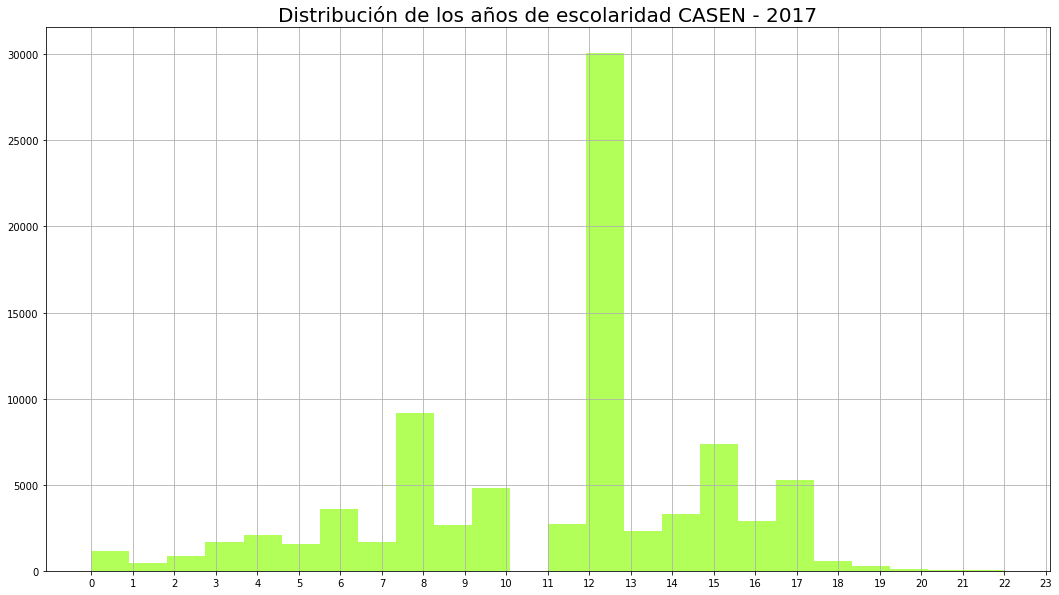

In [79]:
plt.figure(figsize=(18,10))
plt.grid()
plt.hist(df["esc"], facecolor = "#B2FF59", bins = 24)
plt.title("Distribución de los años de escolaridad CASEN - 2017", fontsize = 20)
plt.xticks(np.arange(0, 24, 1))
plt.show()

<hr>

## Cantidad de registros por region

In [80]:
dfRegiones = df.groupby("region").agg({
    "region": "count"
})
dfRegiones.columns = ["registros"]
dfRegiones = dfRegiones.sort_values("registros", ascending=False)
dfRegiones

,registros
region,
Región Metropolitana de Santiago,16528
Región del Biobío,8070
Región de Valparaíso,7500
Región del Maule,6430
Región del Libertador Gral. Bernardo O’Higgins,6389
Región de La Araucanía,6343
Región de Los Lagos,5453
Región de Los Ríos,4029
Región de Tarapacá,3918


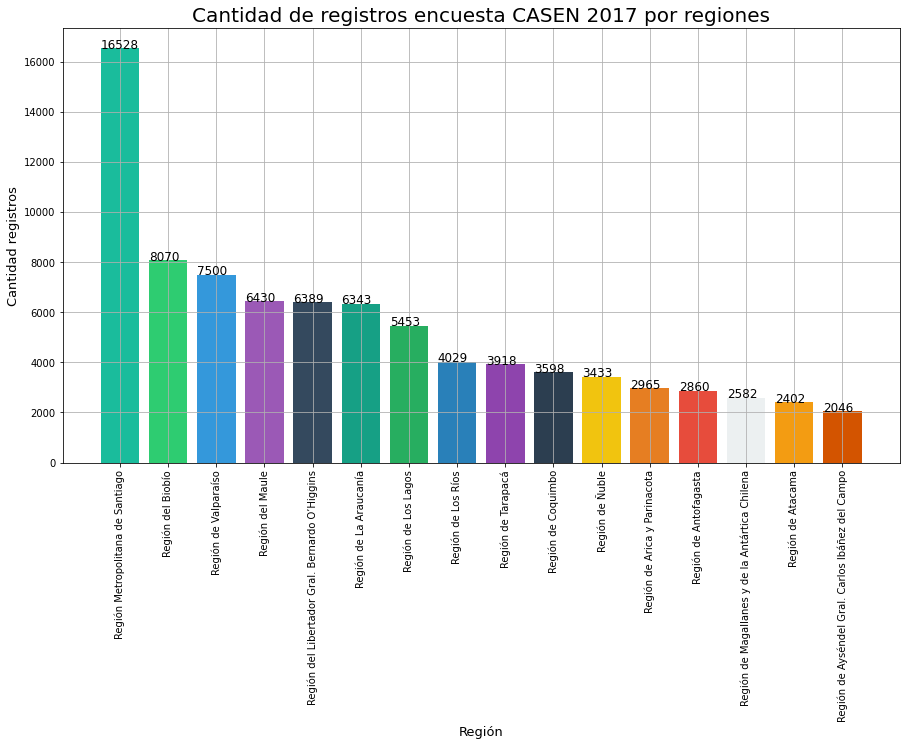

In [81]:
colores = ["#1ABC9C", "#2ECC71", "#3498DB", "#9B59B6", "#34495E", "#16A085", "#27AE60", "#2980B9", "#8E44AD", "#2C3E50", "#F1C40F", "#E67E22", "#E74C3C", "#ECF0F1", "#F39C12", "#D35400"]
plt.figure(figsize=(15,8))
plt.grid()
plt.bar(dfRegiones.index, dfRegiones["registros"], color = colores)
plt.xticks(rotation = 90)
plt.xlabel("Región", fontsize = 13)
plt.ylabel("Cantidad registros", fontsize = 13)
plt.title("Cantidad de registros encuesta CASEN 2017 por regiones", fontsize = 20)
# Se muestra la cantidad por cada barra
for index,data in enumerate(dfRegiones["registros"]):
    plt.text(x = index-0.4, y = data, s = f"{data}", fontdict=dict(fontsize = 12))
plt.show()

<hr>

## Cantidad de registros por zona

In [82]:
dfZonas = df.groupby("zona").agg({
    "zona": "count"
})
dfZonas.columns = ["registros"]
dfZonas

,registros
zona,
Rural,17468
Urbano,67078


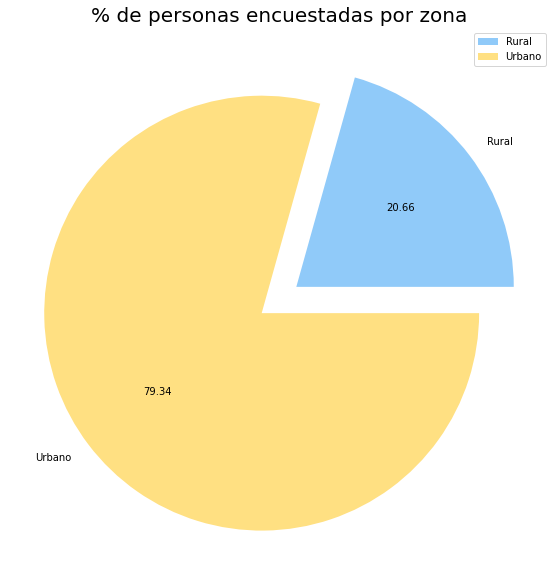

In [83]:
plt.figure(figsize=(18,10))
explode = [0.1, 0.1]
color = ["#90CAF9", "#FFE082"]
plt.pie(dfZonas["registros"], labels= dfZonas.index, autopct="%.2f", explode=explode, colors = color)
plt.legend(loc = "best")
plt.title("% de personas encuestadas por zona", fontsize = 20)
plt.show()

<hr>

## Cantidad de registros por sexo

In [84]:
dfSexo = df.groupby("sexo").agg({
    "sexo": "count"
})
dfSexo.columns = ["registros"]
dfSexo = dfSexo.sort_values("registros", ascending=False)
dfSexo

,registros
sexo,
Hombre,47188
Mujer,37358


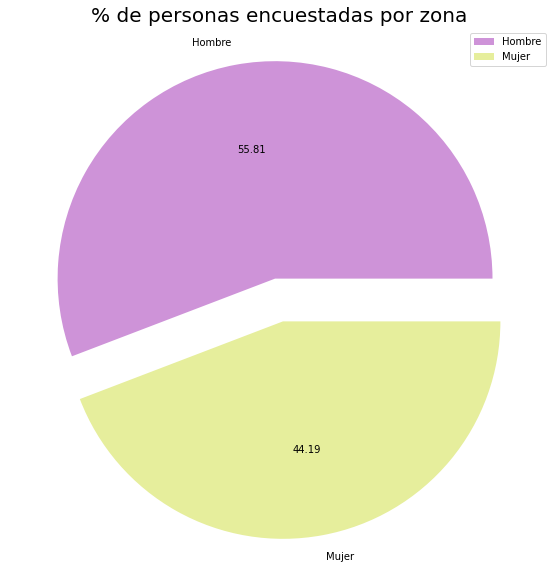

In [85]:
plt.figure(figsize=(18,10))
explode = [0.1, 0.1]
color = ["#CE93D8", "#E6EE9C"]
plt.pie(dfSexo["registros"], labels= dfSexo.index, autopct="%.2f", explode=explode, colors = color)
plt.legend(loc = "best")
plt.title("% de personas encuestadas por zona", fontsize = 20)
plt.show()

<hr>

## Cantidad de registros por tipo de analfabetismo

In [86]:
dfAnalfabetismo = df.groupby("e1").agg({
    "e1": "count"
})
dfAnalfabetismo.columns = ["registros"]
dfAnalfabetismo = dfAnalfabetismo.sort_values("registros", ascending=False)
dfAnalfabetismo

,registros
e1,
"Sí, lee y escribe",81875
"No, ninguno",1822
"No, sólo lee",519
"No, sólo escribe",264
No sabe/responde,66


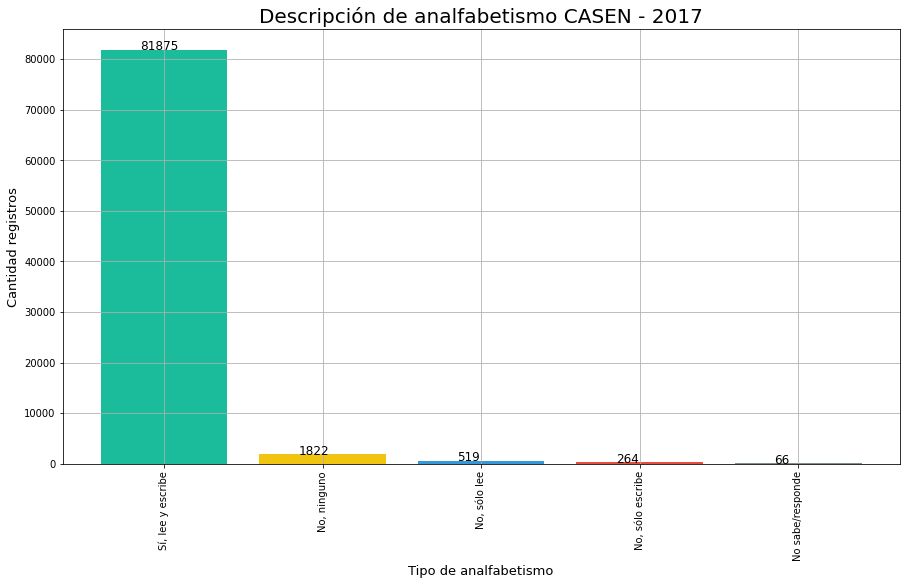

In [87]:
colores = ["#1ABC9C", "#F1C40F", "#3498DB", "#E74C3C", "#7F8C8D"]
plt.figure(figsize=(15,8))
plt.grid()
plt.bar(dfAnalfabetismo.index, dfAnalfabetismo["registros"], color = colores)
plt.xticks(rotation = 90)
plt.xlabel("Tipo de analfabetismo", fontsize = 13)
plt.ylabel("Cantidad registros", fontsize = 13)
plt.title("Descripción de analfabetismo CASEN - 2017", fontsize = 20)
# Se muestra la cantidad por cada barra
for index,data in enumerate(dfAnalfabetismo["registros"]):
    plt.text(x = index-0.15, y = data, s = f"{data}", fontdict=dict(fontsize = 12))
plt.show()

<hr>

## Cantidad de registros por nivel educacional más alto

In [88]:
dfEducacion = df.groupby("e6a").agg({
    "e6a": "count"
})
dfEducacion.columns = ["registros"]
dfEducacion = dfEducacion.sort_values("registros", ascending=False)
dfEducacion

,registros
e6a,
Educación Media Científico-Humanista,30452
Educación Básica,17591
Educación Media Técnica Profesional,9121
Profesional Completo (Carreras 4 o más años),7135
Técnico Nivel Superior Completo (Carreras 1 a 3 años),6746
Profesional Incompleto (Carreras 4 o más años),4365
Primaria o Preparatoria (Sistema antiguo),2837
Técnico Nivel Superior Incompleto (Carreras 1 a 3 años),2649
Humanidades (Sistema Antiguo),1551


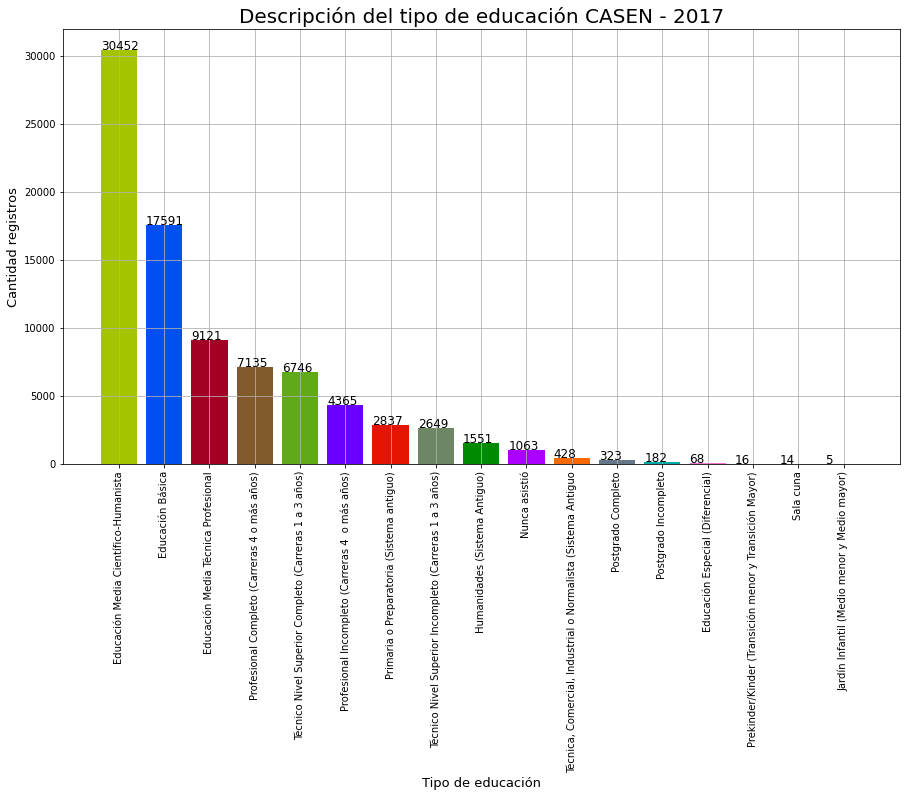

In [89]:
colores = ["#A4C400", "#0050EF", "#A20025", "#825A2C", "#60A917", "#6A00FF", "#E51400", "#6D8764", "#008A00", "#AA00FF", "#FA6800", "#647687", "#00ABA9", "#F472D0", "#F0A30A", "#76608A", "#1BA1E2", "#D80073"]
plt.figure(figsize=(15,8))
plt.grid()
plt.bar(dfEducacion.index, dfEducacion["registros"], color = colores)
plt.xticks(rotation = 90)
plt.xlabel("Tipo de educación", fontsize = 13)
plt.ylabel("Cantidad registros", fontsize = 13)
plt.title("Descripción del tipo de educación CASEN - 2017", fontsize = 20)
# Se muestra la cantidad por cada barra
for index,data in enumerate(dfEducacion["registros"]):
    plt.text(x = index-0.4, y = data, s = f"{data}", fontdict=dict(fontsize = 12))
plt.show()

<hr>

## Cantidad de registros si ha trabajado alguna vez

In [90]:
dfTrabajo1 = df.groupby("o4").agg({
    "o4": "count"
})
dfTrabajo1.columns = ["registros"]
dfTrabajo1

,registros
o4,
No,1140
No sabe/no responde,78259
Sí,5147


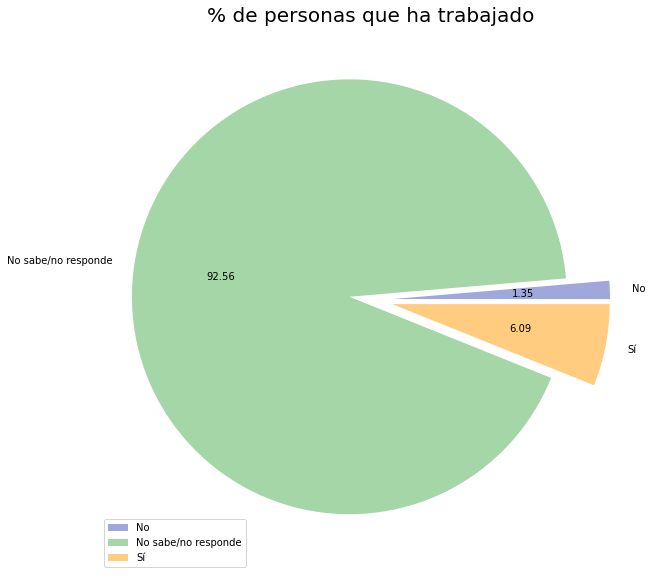

In [91]:
plt.figure(figsize=(18,10))
explode = [0.1, 0.1,0.1]
color = ["#9FA8DA", "#A5D6A7","#FFCC80"]
plt.pie(dfTrabajo1["registros"], labels= dfTrabajo1.index, autopct="%.2f", explode=explode, colors = color)
plt.legend(loc = "best")
plt.title("% de personas que ha trabajado", fontsize = 20)
plt.show()

<hr>

## Cantidad de registros por ocupación u oficio

In [92]:
dfOficio = df.groupby("oficio1").agg({
    "oficio1": "count"
})
dfOficio.columns = ["registros"]
dfOficio = dfOficio.sort_values("registros", ascending=False)
dfOficio

,registros
oficio1,
Trabajadores no calificado,20321
Trabajadores de los servicios y vendedores de comerci,13086
"Oficiales, operarios y artesanos de artes mecánicas y de otr",11908
Operadores de instalaciones y máquinas y montadore,7382
Técnicos profesionales de nivel medi,6928
Sin dato,6536
Empleados de oficina,6003
"Profesionales, científicos e intelectuale",4960
Agricultores y trabajadores calificados agropecuarios y pesq,4464


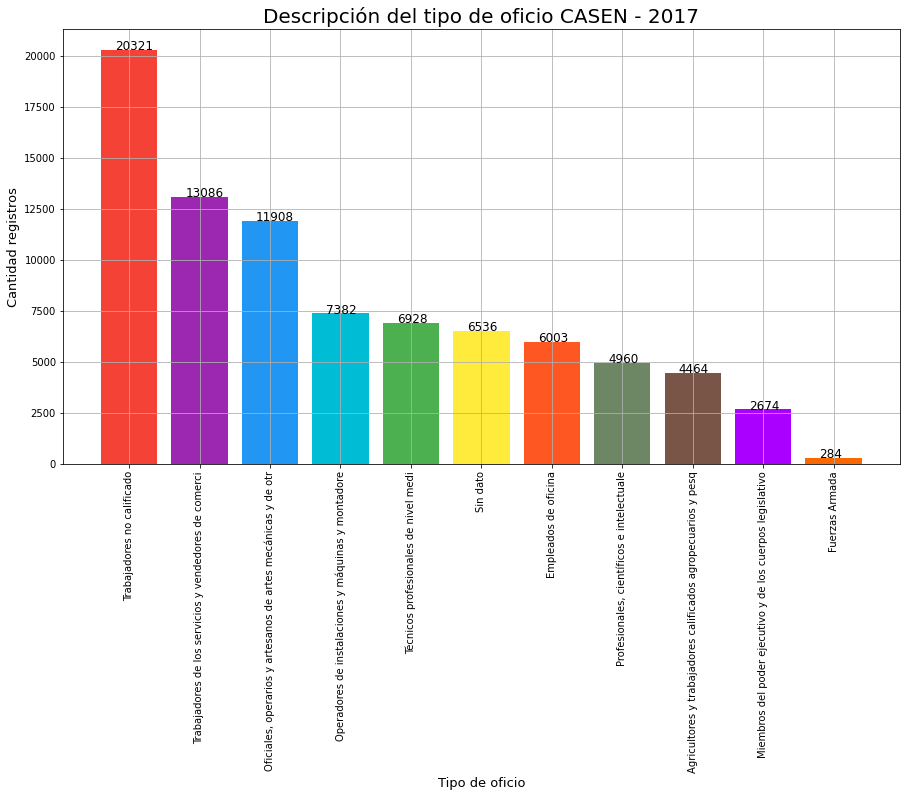

In [93]:
colores = ["#F44336", "#9C27B0", "#2196F3", "#00BCD4", "#4CAF50", "#FFEB3B", "#FF5722", "#6D8764", "#795548", "#AA00FF", "#FA6800"]
plt.figure(figsize=(15,8))
plt.grid()
plt.bar(dfOficio.index, dfOficio["registros"], color = colores)
plt.xticks(rotation = 90)
plt.xlabel("Tipo de oficio", fontsize = 13)
plt.ylabel("Cantidad registros", fontsize = 13)
plt.title("Descripción del tipo de oficio CASEN - 2017", fontsize = 20)
# Se muestra la cantidad por cada barra
for index,data in enumerate(dfOficio["registros"]):
    plt.text(x = index-0.2, y = data, s = f"{data}", fontdict=dict(fontsize = 12))
plt.show()

<hr>

## Cantidad de registros de a qué negocio se dedica

In [94]:
dfNegocio = df.groupby("rama1").agg({
    "rama1": "count"
})
dfNegocio.columns = ["registros"]
dfNegocio = dfNegocio.sort_values("registros", ascending=False)
dfNegocio

,registros
rama1,
Comercio al por mayor y al por menor,15000
"Agricultura, ganadería, caza y silvicultura",9953
Construcción,7370
Sin dato,7097
Industrias manufactureras,6845
Enseñanza,5839
"Transporte, almacenamiento y comunicaciones",5553
Hogares privados con servicio doméstico,4868
Hoteles y restaurantes,4113


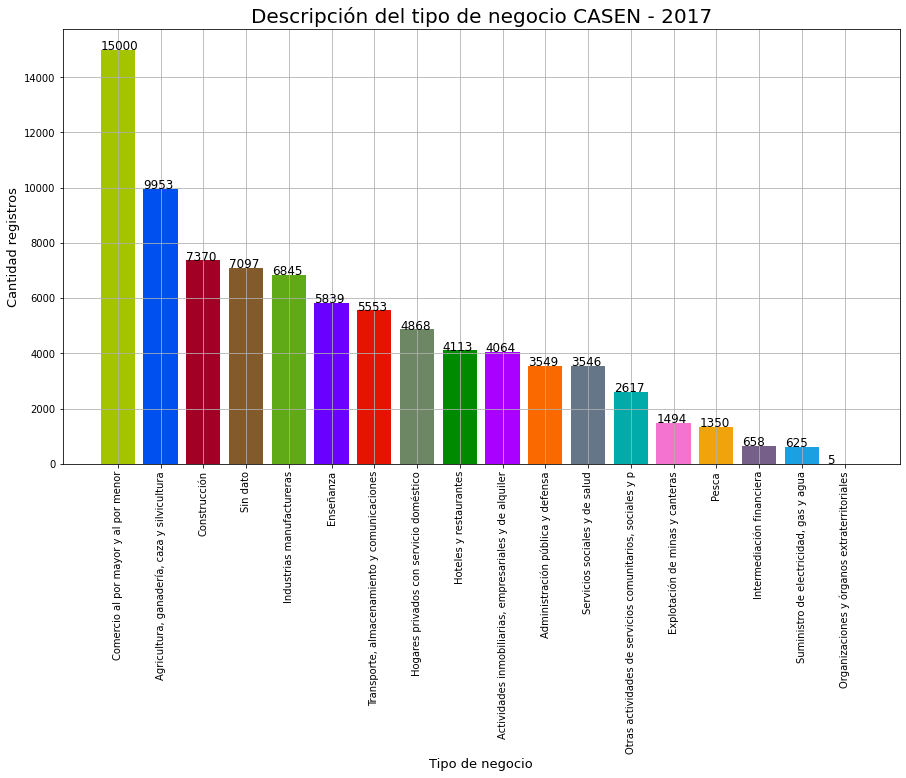

In [95]:
colores = ["#A4C400", "#0050EF", "#A20025", "#825A2C", "#60A917", "#6A00FF", "#E51400", "#6D8764", "#008A00", "#AA00FF", "#FA6800", "#647687", "#00ABA9", "#F472D0", "#F0A30A", "#76608A", "#1BA1E2", "#D80073"]
plt.figure(figsize=(15,8))
plt.grid()
plt.bar(dfNegocio.index, dfNegocio["registros"], color = colores)
plt.xticks(rotation = 90)
plt.xlabel("Tipo de negocio", fontsize = 13)
plt.ylabel("Cantidad registros", fontsize = 13)
plt.title("Descripción del tipo de negocio CASEN - 2017", fontsize = 20)
# Se muestra la cantidad por cada barra
for index,data in enumerate(dfNegocio["registros"]):
    plt.text(x = index-0.4, y = data, s = f"{data}", fontdict=dict(fontsize = 12))
plt.show()

<hr>

## Cantidad de registros por nacionalidad

In [96]:
dfNacionalidad = df.groupby("r1a").agg({
    "r1a": "count"
})
dfNacionalidad.columns = ["registros"]
dfNacionalidad

,registros
r1a,
Chilena (Exclusiva),80678
Chilena y otra (Doble nacionalidad),590
Otra nacionalidad. Especifique país,3278


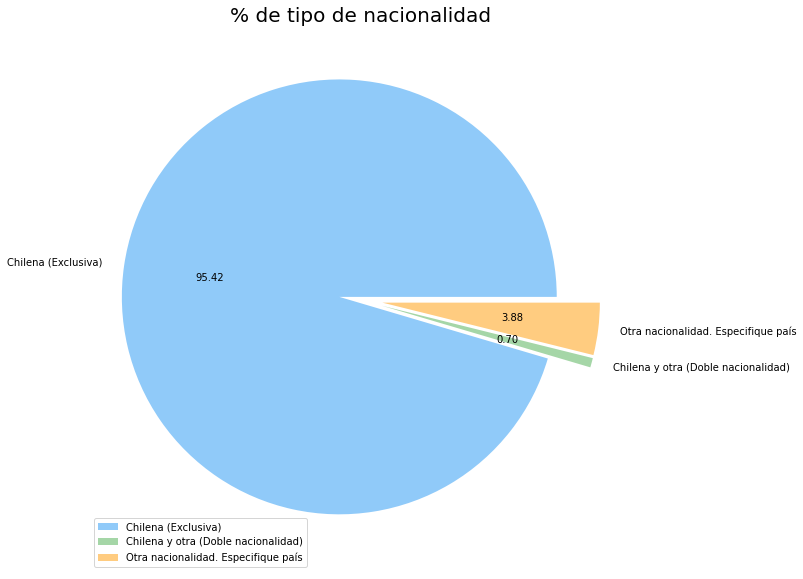

In [97]:
plt.figure(figsize=(18,10))
explode = [0.1, 0.1,0.1]
color = ["#90CAF9", "#A5D6A7","#FFCC80"]
plt.pie(dfNacionalidad["registros"], labels= dfNacionalidad.index, autopct="%.2f", explode=explode, colors = color)
plt.legend(loc = "best")
plt.title("% de tipo de nacionalidad", fontsize = 20)
plt.show()

<hr>

## Cantidad de registros por actividad económica

In [98]:
dfActEconomica = df.groupby("activ").agg({
    "activ": "count"
})
dfActEconomica.columns = ["registros"]
dfActEconomica

,registros
activ,
Desocupados,1331
Inactivos,4983
Ocupados,78232


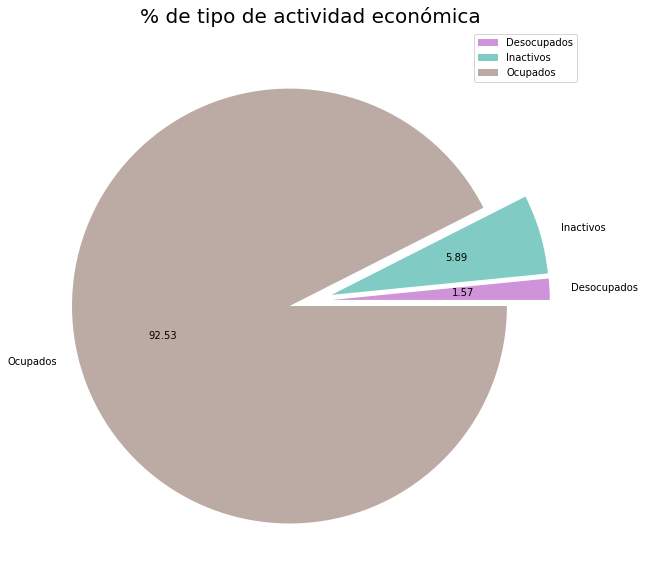

In [99]:
plt.figure(figsize=(18,10))
explode = [0.1, 0.1,0.1]
color = ["#CE93D8", "#80CBC4","#BCAAA4"]
plt.pie(dfActEconomica["registros"], labels= dfActEconomica.index, autopct="%.2f", explode=explode, colors = color)
plt.legend(loc = "best")
plt.title("% de tipo de actividad económica", fontsize = 20)
plt.show()

# Se exporta el dataset limpio para ser usado en el modelo de regresión lineal múltiple

In [100]:
df_copia = df
# Se crea el objeto que escribe el dataset
writer = pd.ExcelWriter('CASEN2017_seleccionada_imputada.xlsx')
# Se setea el data set sin los indices que atribuye pandas
df_copia.to_excel(writer, index=False)
# Se guarda el dataset en cuestion
writer.save()
print('Se ha exportado el excel.')

Se ha exportado el excel.
